<a href="https://colab.research.google.com/github/SaraAljuraybah/saudi-tech-job-skills-analysis/blob/main/notebooks/data_collection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Step 1: Load the Raw Dataset**

The raw dataset collected from the JSearch API was loaded into the notebook using pandas. The dataset contains job postings from the Saudi labor market and includes both structured and unstructured features.

In [ ]:
import pandas as pd

df = pd.read_excel("jobs_sa_raw.xlsx")

df.shape

(1024, 31)

**Step 2: Identify Missing Values**

Missing values were analyzed across all columns to identify features with high null counts. Columns with 100% missing values or irrelevant information were considered for removal.

In [ ]:
df.isnull().sum().sort_values(ascending=False)

,0
job_posted_at_timestamp,1024
job_max_salary,1024
job_salary_period,1024
job_salary,1024
job_benefits,1024
job_state,1024
job_posted_at_datetime_utc,1024
job_min_salary,1024
employer_logo,635
job_posted_at,391


**Step 3: Remove Irrelevant Features/Empty Columns**

Columns that contained only missing values or were not relevant to the research objective (such as salary-related fields and logos) were removed to improve dataset quality and reduce noise.

In [ ]:
cols_to_drop = [
    "job_salary",
    "job_min_salary",
    "job_max_salary",
    "job_salary_period",
    "job_benefits",
    "job_state",
    "job_posted_at_timestamp",
    "job_posted_at_datetime_utc",
    "employer_logo",
    "employer_website"
]

df = df.drop(columns=cols_to_drop)

In [ ]:
df.shape

(1024, 21)

After removing irrelevant columns, the dataset was reduced from (1024, 31) to (1024, 22).

**Step 4: Handle Duplicate Records**

The dataset was checked for duplicate rows. Four duplicate records were identified and removed to ensure the integrity and reliability of the analysis.

In [ ]:
df.duplicated().sum()

np.int64(4)

In [ ]:
df = df.drop_duplicates()

In [ ]:
df.shape

(1020, 21)

After removing duplicate records, the dataset size became (1020, 22).

In [ ]:
df["job_description"].head()

,job_description
0,Be the change. Join the world’s most visionary...
1,About Mozn\n\nMOZN is a leading Enterprise AI ...
2,About MOZN\n\nMOZN is a leading Enterprise AI ...
3,A data solutions company located in Riyadh is ...
4,The Data Scientist is responsible for deliveri...


**Step 5: Text Preprocessing**

Since job descriptions are unstructured textual data, preprocessing was applied. This included converting text to lowercase, removing special characters, eliminating newline characters, and normalizing whitespace.
A new column named clean_description was created to preserve the original text

In [ ]:
import re

def clean_text(text):
    text = text.lower()
    text = re.sub(r'\n', ' ', text)
    text = re.sub(r'[^a-zA-Z0-9\s]', '', text)
    text = re.sub(r'\s+', ' ', text).strip()
    return text

df["clean_description"] = df["job_description"].apply(clean_text)

In [ ]:
df.shape

(1020, 22)

**Step 6: Export Cleaned Dataset**

After completing the cleaning process, the final cleaned dataset was exported as a CSV file for further exploratory data analysis (EDA) and modeling.

In [ ]:
df.to_csv("jobs_sa_cleaned.csv", index=False)

# Exploratory Data Analysis (EDA)

اول شي الشيب حق الداتا , كم عامود و صف  و نوع البيانات و

---

اهم المتغيرات

In [ ]:
print("Shape:", df.shape)



Shape: (1020, 22)


In [ ]:
df.columns

Index(['job_id', 'job_title', 'employer_name', 'job_publisher',
       'job_employment_type', 'job_employment_types', 'job_apply_link',
       'job_apply_is_direct', 'apply_options', 'job_description',
       'job_is_remote', 'job_posted_at', 'job_location', 'job_city',
       'job_country', 'job_latitude', 'job_longitude', 'job_google_link',
       'job_onet_soc', 'job_onet_job_zone', 'search_query',
       'clean_description'],
      dtype='object')

In [ ]:
df.describe(include='all')

,job_id,job_title,employer_name,job_publisher,job_employment_type,job_employment_types,job_apply_link,job_apply_is_direct,apply_options,job_description,...,job_location,job_city,job_country,job_latitude,job_longitude,job_google_link,job_onet_soc,job_onet_job_zone,search_query,clean_description
count,1020,1020,1020,1020,1009,1020,1020,1020,1020,1020,...,1020,774,1020,1020.000000,1020.000000,1020,1.003000e+03,1002.000000,1020,1020
unique,939,798,420,93,6,6,939,2,940,903,...,22,17,1,NaN,NaN,939,NaN,NaN,10,889
top,0MP7Wcw86R9vgZiIAAAAAA==,AI Engineer,Master-Works,BeBee SA,دوام كامل,['FULLTIME'],https://sa.bebee.com/job/888d204d4b30246aa394a...,False,"[{'publisher': 'BeBee SA', 'apply_link': 'http...",A leading data analytics firm is seeking a Sen...,...,الرياض,الرياض,SA,NaN,NaN,https://www.google.com/search?q=jobs&gl=sa&hl=...,NaN,NaN,full stack developer,a leading data analytics firm is seeking a sen...
freq,3,6,59,179,949,949,3,938,3,8,...,597,597,1020,NaN,NaN,3,NaN,NaN,137,8
mean,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,24.240112,45.652308,NaN,1.803071e+07,4.157685,NaN,NaN
std,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,1.256404,2.491162,NaN,8.682926e+06,0.598938,NaN,NaN
min,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,16.889359,36.566191,NaN,1.120210e+07,2.000000,NaN,NaN
25%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,23.885942,45.079162,NaN,1.511110e+07,4.000000,NaN,NaN
50%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,24.713552,46.675296,NaN,1.511320e+07,4.000000,NaN,NaN
75%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,24.713552,46.675296,NaN,1.511330e+07,5.000000,NaN,NaN


# Job Titles Distribution





To ensure accurate frequency counts, job titles were standardized by converting text to lowercase, removing extra spaces, and normalizing punctuation. This prevented artificial duplication caused by formatting differences while preserving the actual job title meaning.

 We can see that the most frequent job title is :
  

*  AI Engineer
*  Backend Developer
*  Senior Data Engineer
*  Remote Senior Data Engineer - ETL, Python & ML Architect





 indicating that the Saudi job market has high demand for this role.





In [ ]:
import re

def standardize_title(t):
    if pd.isna(t):
        return t
    t = str(t).lower().strip()
    t = re.sub(r"\s+", " ", t)          # توحيد المسافات
    t = re.sub(r"[^\w\s&-]", "", t)     # حذف الرموز الغريبة (مع إبقاء & و -)
    t = t.replace("–", "-").replace("—", "-")  # توحيد أنواع الداش
    return t

df["job_title_std"] = df["job_title"].apply(standardize_title)

In [ ]:
top_titles = df["job_title_std"].value_counts().head(10)
top_titles

,count
job_title_std,
ai engineer,8
backend developer,7
senior data engineer,6
remote senior data engineer - etl python & ml architect,6
data scientist,5
senior data engineer - remote flexible hours & growth,5
software engineer - backend mid-level remote,5
data analyst,5
lead data engineer,4


# City Distribution



**Riyadh** appears to have the highest concentration of data-related jobs

In [ ]:
top_cities = df["job_city"].value_counts().head(10)
top_cities

,count
job_city,
الرياض,597
جدة,62
مكة,31
الدمام,22
الخبر,14
الظهران,13
المدينة المنورة,7
جازان,6
ينبع,6


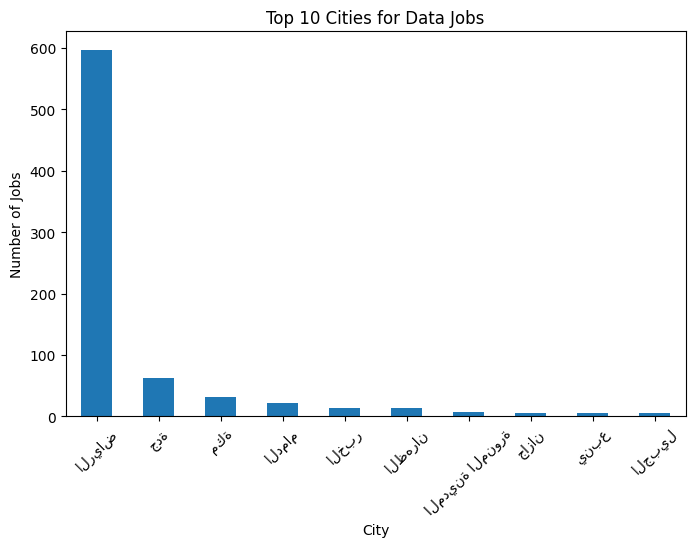

In [ ]:
plt.figure(figsize=(8,5))
top_cities.plot(kind='bar')
plt.title("Top 10 Cities for Data Jobs")
plt.xlabel("City")
plt.ylabel("Number of Jobs")
plt.xticks(rotation=45)
plt.show()

# **Skill Frequency Analysis**

In this step we are extracting skills from job descriptions and count their occurrences to identify the most demanded skills in Saudi data and AI job postings.

The extraction is keyword-based and may under/over-count some skills depending on how they are mentioned

In [ ]:
import pandas as pd
import re

# 1) Skill dictionary: key = اسم موحد, values = صيغ ممكن تطلع في النص
skill_dict = {
    "python": ["python"],
    "sql": ["sql", "structured query language"],
    "excel": ["excel", "ms excel", "microsoft excel", "spreadsheet", "spreadsheets", "google sheets"],
    "power bi": ["power bi", "powerbi"],
    "tableau": ["tableau"],
    "machine learning": ["machine learning", "ml"],
    "deep learning": ["deep learning", "dl"],
    "nlp": ["nlp", "natural language processing"],
    "tensorflow": ["tensorflow"],
    "pytorch": ["pytorch"],
    "aws": ["aws", "amazon web services"],
    "azure": ["azure", "microsoft azure"],
    "gcp": ["gcp", "google cloud"],
    "spark": ["spark", "apache spark"],
    "docker": ["docker"],
    "kubernetes": ["kubernetes", "k8s"],
    "statistics": ["statistics", "statistical"],
    "data visualization": ["data visualization", "visualization", "data visualisation"],
        "communication": ["communication", "communication skills"],
    "teamwork": ["teamwork", "collaboration", "collaborative"],
    "problem solving": ["problem solving", "problem-solving"],
    "critical thinking": ["critical thinking"],
"leadership": ["leadership", "leadership skills"],
    "time management": ["time management"],
    "presentation": ["presentation", "presenting"],
    "stakeholder management": ["stakeholder management", "stakeholder management skills"],
    "attention to detail": ["attention to detail", "detail oriented", "detail-oriented"]

}


# 2) دالة استخراج مهارات من نص واحد
def extract_skills(text, skill_dict):
    if pd.isna(text):
        return []
    found = set()
    for skill, patterns in skill_dict.items():
        for p in patterns:
            # نستخدم حدود الكلمات قدر الإمكان لتقليل الأخطاء
            if re.search(r"\b" + re.escape(p) + r"\b", text):
                found.add(skill)
                break
    return list(found)

# 3) ننشئ عمود skills_extracted
df["skills_extracted"] = df["clean_description"].apply(lambda x: extract_skills(x, skill_dict))
# 4) نحسب التكرار
skills_series = df["skills_extracted"].explode().dropna()
skill_counts = skills_series.value_counts()

skill_counts.head(20)

,count
skills_extracted,
python,391
communication,363
teamwork,361
sql,311
machine learning,236
gcp,185
aws,176
azure,155
docker,137


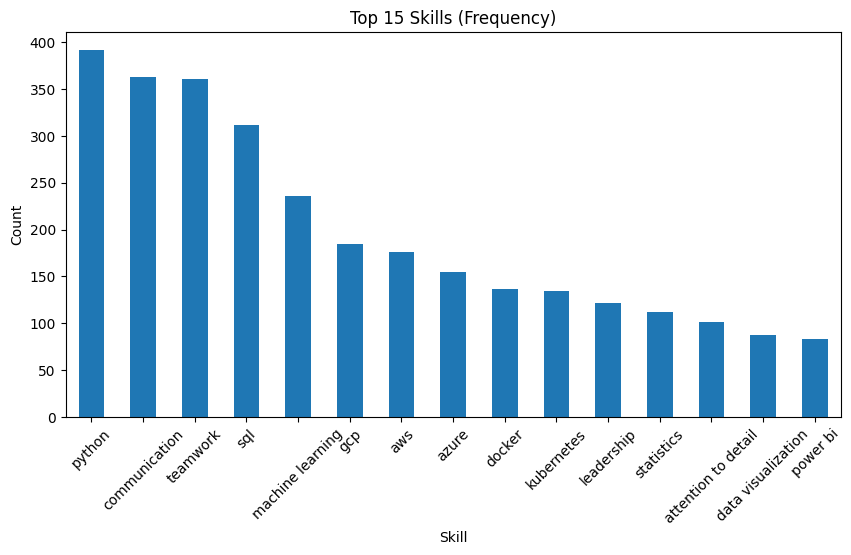

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10,5))
skill_counts.head(15).plot(kind="bar")
plt.title("Top 15 Skills (Frequency)")
plt.xlabel("Skill")
plt.ylabel("Count")
plt.xticks(rotation=45)
plt.show()

In [ ]:
skill_percent = (skill_counts / len(df) * 100).round(2)
print("percintage")
skill_percent.head(15)

percintage


,count
skills_extracted,
python,38.33
communication,35.59
teamwork,35.39
sql,30.49
machine learning,23.14
gcp,18.14
aws,17.25
azure,15.20
docker,13.43


# **Skill Category Distribution**

Group extracted skills into categories and calculate their proportions to understand the balance of skill types requested by employers.

In [ ]:
skill_category = {
    # Technical
    "python": "Technical",
    "sql": "Technical",
    "excel": "Technical",
    "power bi": "Technical",
    "tableau": "Technical",
    "aws": "Technical",
    "azure": "Technical",
    "gcp": "Technical",
    "docker": "Technical",
    "kubernetes": "Technical",
    "spark": "Technical",
    "hadoop": "Technical",
    "tensorflow": "Technical",
    "pytorch": "Technical",

    # Analytical
    "machine learning": "Analytical",
    "deep learning": "Analytical",
    "nlp": "Analytical",
    "statistics": "Analytical",
    "data visualization": "Analytical",

    # Soft
    "communication": "Soft",
    "teamwork": "Soft",
    "problem solving": "Soft",
    "critical thinking": "Soft",
    "leadership": "Soft",
    "time management": "Soft",
    "presentation": "Soft",
    "stakeholder management": "Soft",
    "attention to detail": "Soft"
}

def count_categories(skills):
    counts = {"Technical": 0, "Analytical": 0, "Soft": 0}
    for s in skills:
        cat = skill_category.get(s)
        if cat:
            counts[cat] += 1
    return pd.Series(counts)

cat_counts = df["skills_extracted"].apply(count_categories)

df["Technical_count"] = cat_counts["Technical"]
df["Analytical_count"] = cat_counts["Analytical"]
df["Soft_count"] = cat_counts["Soft"]

category_totals = df[["Technical_count","Analytical_count","Soft_count"]].sum()
category_percent = (category_totals / category_totals.sum() * 100).round(2)

category_totals, category_percent

(Technical_count     1868
 Analytical_count     583
 Soft_count          1083
 dtype: int64,
 Technical_count     52.86
 Analytical_count    16.50
 Soft_count          30.65
 dtype: float64)

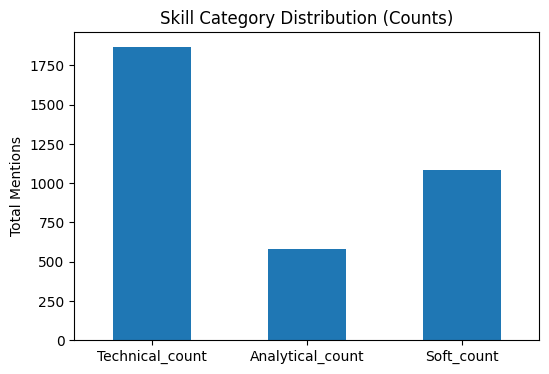

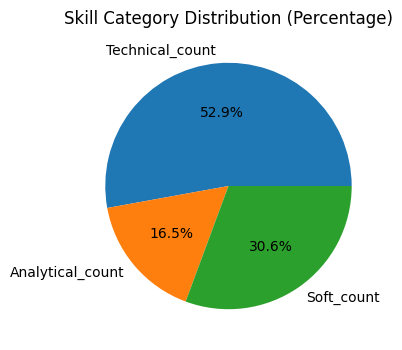

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(6,4))
category_totals.plot(kind="bar")
plt.title("Skill Category Distribution (Counts)")
plt.ylabel("Total Mentions")
plt.xticks(rotation=0)
plt.show()

plt.figure(figsize=(6,4))
category_percent.plot(kind="pie", autopct="%1.1f%%")
plt.title("Skill Category Distribution (Percentage)")
plt.ylabel("")
plt.show()



Extracted skills were categorized into **Technical**, **Analytical**, and **Soft** skills. Results show that **Technical skills represent 52.9%** of total skill mentions, followed by **Soft skills at 30.6%**, and **Analytical skills at 16.5%**. This indicates that Saudi data and AI job postings strongly emphasize practical technical tools, while also frequently requiring interpersonal and communication skills. Analytical competencies appear prominently but are more role-specific.

# **Role-Based Comparative Analysis**

a rule-based mapping function was applied to group similar job titles into broader role categories.

For example:

Titles containing “data scientist” were mapped to Data Scientist

Titles containing “data analyst” were mapped to Data Analyst

Titles containing “data engineer” were mapped to Data Engineer

Titles containing “AI engineer”, “ML engineer”, or “machine learning” were grouped under AI/ML Engineer

Remaining titles that did not match predefined patterns were labeled as Other

This grouping step ensured that variations in job title wording did not fragment the analysis.

In [ ]:
def map_role(title):
    t = str(title).lower()

    if "data scientist" in t:
        return "Data Scientist"
    if "data analyst" in t:
        return "Data Analyst"
    if "data engineer" in t:
        return "Data Engineer"
    if "ai engineer" in t or "ml engineer" in t or "machine learning" in t:
        return "AI/ML Engineer"
    if "backend" in t:
        return "Backend Developer"
    if "software engineer" in t:
        return "Software Engineer"
    if "cloud" in t:
        return "Cloud Engineer"

    return "Other"

df["role_group"] = df["job_title_std"].apply(map_role)
df["role_group"].value_counts().head(10)

,count
role_group,
Other,406
AI/ML Engineer,113
Data Engineer,96
Software Engineer,95
Backend Developer,93
Data Analyst,84
Cloud Engineer,67
Data Scientist,66


In [ ]:
top_roles = df["role_group"].value_counts().drop("Other").head(7)
top_roles

,count
role_group,
AI/ML Engineer,113
Data Engineer,96
Software Engineer,95
Backend Developer,93
Data Analyst,84
Cloud Engineer,67
Data Scientist,66


In [ ]:
def top_skills_role(role, n=10):
    sub = df[df["role_group"] == role]
    return sub["skills_extracted"].explode().value_counts().head(n)

for role in top_roles.index:
    print(f"\nROLE: {role} | postings: {len(df[df['role_group']==role])}")
    display(top_skills_role(role, 10))


ROLE: AI/ML Engineer | postings: 113


,count
skills_extracted,
machine learning,70
python,69
pytorch,43
tensorflow,39
teamwork,38
communication,35
nlp,30
gcp,28
deep learning,24



ROLE: Data Engineer | postings: 96


,count
skills_extracted,
sql,63
python,47
teamwork,43
machine learning,26
aws,26
gcp,25
communication,23
azure,22
spark,18



ROLE: Software Engineer | postings: 95


,count
skills_extracted,
teamwork,49
communication,49
python,48
docker,31
aws,31
sql,30
kubernetes,28
gcp,22
leadership,19



ROLE: Backend Developer | postings: 93


,count
skills_extracted,
sql,39
python,35
teamwork,30
docker,19
communication,18
aws,16
kubernetes,15
azure,13
leadership,12



ROLE: Data Analyst | postings: 84


,count
skills_extracted,
sql,45
power bi,38
communication,36
excel,33
statistics,29
python,27
attention to detail,26
tableau,24
data visualization,23



ROLE: Cloud Engineer | postings: 67


,count
skills_extracted,
gcp,44
communication,27
kubernetes,25
python,24
teamwork,20
azure,16
docker,14
aws,12
sql,10



ROLE: Data Scientist | postings: 66


,count
skills_extracted,
machine learning,49
python,43
statistics,40
sql,25
communication,23
teamwork,18
deep learning,18
nlp,17
pytorch,16


# **Comparison: Role1 vs Role2**

The role-based comparison reveals that although technical overlap exists across data and AI roles, each position demonstrates a distinct skill emphasis aligned with its functional responsibilities.

**1- Data Scientist vs Data Analyst**

**Data Analyst** positions emphasize data querying and reporting tools such as SQL, Power BI, and Excel, reflecting a focus on descriptive analytics and business reporting.

**Data Scientist** roles prioritize machine learning, Python, and statistical modeling, with additional demand for deep learning frameworks and NLP.


This suggests that Data Scientists are more involved in predictive modeling and AI system development, while Data Analysts focus on interpreting structured data and generating insights for business decision-making.






**2- Data Engineer vs AI/ML Engineer**

Although both roles require strong programming skills (particularly Python), their technical focus differs significantly.

**Data Engineer** postings highlight SQL, cloud platforms (AWS, GCP, Azure), and data processing tools such as Spark, indicating responsibility for building and maintaining data infrastructure.

**AI/ML Engineer** roles emphasize machine learning, deep learning frameworks (PyTorch, TensorFlow), and NLP, suggesting a focus on model development and AI implementation rather than data pipeline construction.

**3- Data Analyst vs Data Engineer**

While both roles require SQL, their application of technical skills differs

**Data Analyst** emphasize business intelligence tools and visualization skills, reflecting their role in transforming data into actionable insights.

**Data Engineer** demonstrate stronger demand for cloud technologies and large-scale data processing tools, indicating a more infrastructure-oriented role centered around data architecture and system performance.